In [1]:
import proplot as pplt
import matplotlib as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from sklearn.linear_model import TheilSenRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [25]:
def prepare_data(landcover_filepath, area_filepath):
    landcover = pd.read_csv(landcover_filepath)
    area = pd.read_csv(area_filepath)

    dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)
    county = gpd.read_file('./Data/counties_2021.geojson')
    county = county.to_crs(dest_crs)[['ADM2_NAME', 'geometry']]

    combined = gpd.GeoDataFrame(pd.concat([landcover, area, county], axis=1))
    # combined['total_prcp_per_area'] = combined['total']/combined.geometry.area
    # combined['recent_prcp_per_area'] = combined['recent']/combined.geometry.area
    # combined['anom_prcp_per_area'] = combined['anom']/combined.geometry.area
    combined['total_forest'] = combined['deciduous'] + combined['evergreen'] + combined['mixed']
    combined['perc_deciduous'] = combined['deciduous']/combined['total_forest']
    combined['perc_evergreen'] = combined['evergreen']/combined['total_forest']
    combined['perc_mixed'] = combined['mixed']/combined['total_forest']
    combined['perc_defol_area'] = combined['sum']/combined['count']
    
    return combined

In [26]:
combined = prepare_data('./Data/Enviro/landcover_distribution.csv', './Data/Enviro/defol_area_county_2021.csv')

In [44]:
def quantile_regression(combined, x_variable, xlabel, save=False, filename=''):
    quantiles = [0.25, 0.5, 0.75]

    # fit the model
    models = [smf.quantreg(f'perc_defol_area ~ {x_variable}', combined).fit(q=q)
              for q in quantiles]
    
    fig, ax = pplt.subplots(figsize=('90mm','90mm'))

    xs = np.array([combined[x_variable].min(), combined[x_variable].max()])
    ys = [model.params['Intercept'] + xs*model.params[x_variable] for model in models]

    ax.scatter(combined[x_variable], combined['perc_defol_area'], color='darkgray', ms=10, label='')
    linestyles = ['dotted', 'dashed', 'solid']
    for i, y in enumerate(ys):
        ax.plot(xs, y, label=f'q = {quantiles[i]}', linestyle=linestyles[i], color='black')

    ax.legend(ncols=1)
    ax.format(xlabel=xlabel, ylabel='% of Area Defoliated')
    if save:
        fig.savefig(filename)
        
    return models

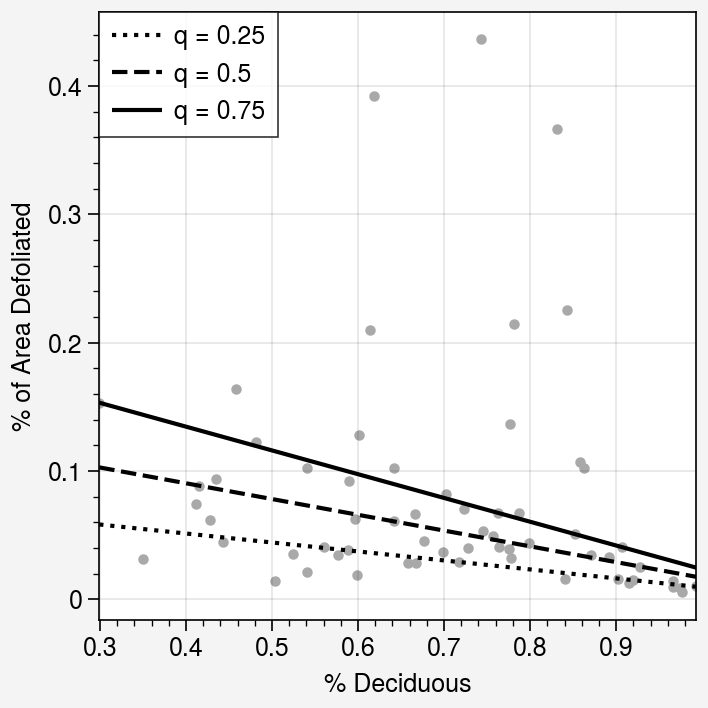

In [56]:
decid_models = quantile_regression(combined, 'perc_deciduous', '% Deciduous', save=True, filename='./Figures/Enviro/deciduous_landcover.png')

In [50]:
print(decid_models[0].summary())
print(decid_models[1].summary())
print(decid_models[2].summary())

                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_area   Pseudo R-squared:              0.07962
Model:                       QuantReg   Bandwidth:                     0.04838
Method:                 Least Squares   Sparsity:                       0.1086
Date:                Tue, 14 Jan 2025   No. Observations:                   62
Time:                        11:36:37   Df Residuals:                       60
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0792      0.028      2.811      0.007       0.023       0.136
perc_deciduous    -0.0699      0.040     -1.769      0.082      -0.149       0.009
                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_are

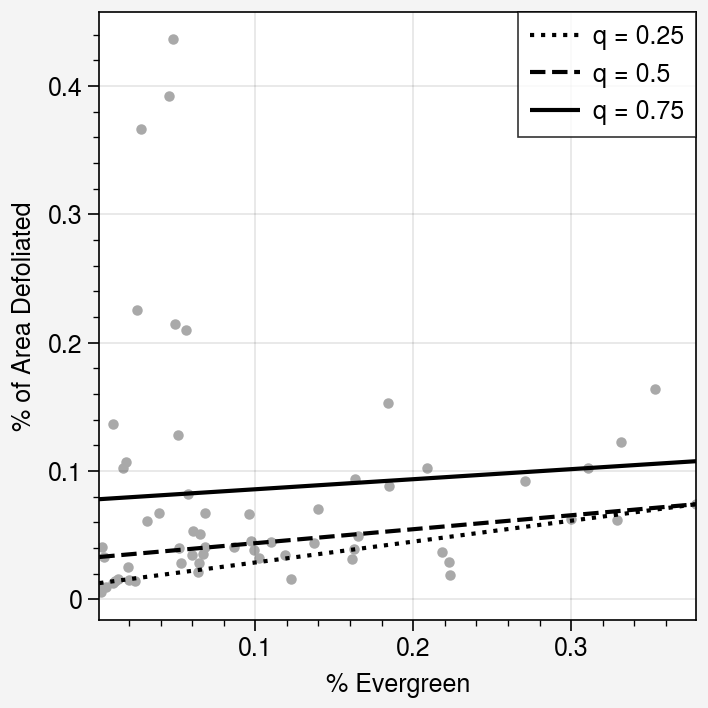

In [57]:
ever_models = quantile_regression(combined, 'perc_evergreen', '% Evergreen', save=True, filename='./Figures/Enviro/evergreen_landcover.png')

In [52]:
print(ever_models[0].summary())
print(ever_models[1].summary())
print(ever_models[2].summary())

                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_area   Pseudo R-squared:              0.09008
Model:                       QuantReg   Bandwidth:                     0.04786
Method:                 Least Squares   Sparsity:                       0.1069
Date:                Tue, 14 Jan 2025   No. Observations:                   62
Time:                        11:37:36   Df Residuals:                       60
                                        Df Model:                            1
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0124      0.009      1.357      0.180      -0.006       0.031
perc_evergreen     0.1626      0.069      2.347      0.022       0.024       0.301
                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_are

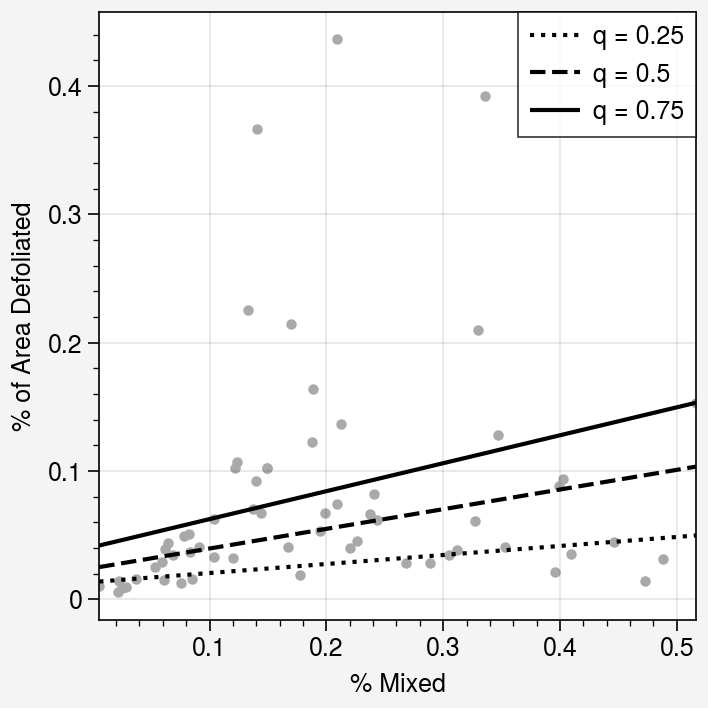

In [58]:
mixed_models = quantile_regression(combined, 'perc_mixed', '% Mixed', save=True, filename='./Figures/Enviro/mixed_landcover.png')

In [55]:
print(mixed_models[0].summary())
print(mixed_models[1].summary())
print(mixed_models[2].summary())

                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_area   Pseudo R-squared:              0.03166
Model:                       QuantReg   Bandwidth:                     0.05835
Method:                 Least Squares   Sparsity:                       0.1278
Date:                Tue, 14 Jan 2025   No. Observations:                   62
Time:                        11:38:55   Df Residuals:                       60
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0135      0.015      0.921      0.361      -0.016       0.043
perc_mixed     0.0703      0.066      1.067      0.290      -0.061       0.202
                         QuantReg Regression Results                          
Dep. Variable:        perc_defol_area   Pseudo R-squ